Stochastic gradient descent


In [ ]:
%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

In [ ]:
apply_transform = transforms.Compose([transforms.ToTensor()])
BatchSize =[256] 
for i in BatchSize:
  trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
  trainLoader = torch.utils.data.DataLoader(trainset, batch_size=i,
                                          shuffle=True, num_workers=4) # Creating dataloader
  # Validation set with random rotations in the range [-90,90]
  testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
  testLoader = torch.utils.data.DataLoader(testset, batch_size=i,
                                         shuffle=False, num_workers=4) # Creating dataloader


  class MLP(nn.Module):   # nn.Module --> Base class for all NN modules
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784,100)
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = F.log_softmax(x,dim=1)
        return x

  net = MLP()

  criterion = nn.CrossEntropyLoss()
  train_loss1 = []
  train_loss2 = []
  train_loss3 = []
  train_acc1 = []
  train_acc2 = []
  train_acc3 = []
  learning_rate = [.1,.01,.001]
  for j in learning_rate:
     optimizer1 = torch.optim.SGD(net.parameters(), lr=j, momentum=0.9) # SGD
     num_epochs = 50
     print('train_loss and train_acc for learning_rate: {:.4f}'.format(j))
     for epoch in range(num_epochs):
       running_loss = 0.0
       running_corr = 0
       for k,data in enumerate(trainLoader):
         inputs,labels = data
         # if use_gpu:
         #    inputs, labels = inputs.cuda(),labels.cuda() 
         # Initializing model gradients to zero
         optimizer1.zero_grad() 
         # Data feed-forward through the network
         outputs = net(inputs.view(inputs.shape[0],-1))
         # Predicted class is the one with maximum probability
         preds = torch.argmax(outputs,dim=1)
         # Finding the loss
         loss = criterion(outputs, labels) 
         # Accumulating the loss for each batch
         running_loss += loss 
         # Accumulate number of correct predictions
         running_corr += torch.sum(preds==labels)       
       totalLoss = running_loss/(i+1)
       # Calculating gradients
       totalLoss.backward()
       # Updating the model parameters
       optimizer1.step()   
       epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
       epoch_acc = running_corr.item()/60000
       if j==.1:
         train_loss1.append(epoch_loss) #Saving the loss over epochs for plotting the graph
         train_acc1.append(epoch_acc)   #Saving the accuracy over epochs for plotting the graph
       if j==.01:
         train_loss2.append(epoch_loss) #Saving the loss over epochs for plotting the graph
         train_acc2.append(epoch_acc)   #Saving the accuracy over epochs for plotting the graph 
       if j==.001:
         train_loss3.append(epoch_loss) #Saving the loss over epochs for plotting the graph
         train_acc3.append(epoch_acc)   #Saving the accuracy over epochs for plotting the graph        
       print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

       # testing the model
     correct_pred = 0
     for data in testLoader:
       inputs,labels = data
       # if use_gpu:
    #    inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
       output = net(inputs.view(inputs.shape[0],-1)) 
    # Predicted class is the one with maximum probability
       preds = torch.argmax(output,dim=1)
       correct_pred += torch.sum(preds==labels)
     test_accuracy = correct_pred.item()/10000.0
     print('Testing accuracy for learning_rate:{:.4f} = {:.2f} '.format(j,test_accuracy*100))

train_loss and train_acc for learning_rate: 0.1000
Epoch 1/50 : Training loss: 2.1206 | Training Accuracy: 9.7900
Epoch 2/50 : Training loss: 2.1104 | Training Accuracy: 9.7433
Epoch 3/50 : Training loss: 2.0982 | Training Accuracy: 20.7650
Epoch 4/50 : Training loss: 2.0905 | Training Accuracy: 12.0033
Epoch 5/50 : Training loss: 2.0868 | Training Accuracy: 20.0400
Epoch 6/50 : Training loss: 2.0825 | Training Accuracy: 21.1817
Epoch 7/50 : Training loss: 2.0733 | Training Accuracy: 22.4317
Epoch 8/50 : Training loss: 2.0587 | Training Accuracy: 26.6967
Epoch 9/50 : Training loss: 2.0417 | Training Accuracy: 32.8417
Epoch 10/50 : Training loss: 2.0257 | Training Accuracy: 38.9983
Epoch 11/50 : Training loss: 2.0117 | Training Accuracy: 39.5867
Epoch 12/50 : Training loss: 1.9980 | Training Accuracy: 34.5400
Epoch 13/50 : Training loss: 1.9817 | Training Accuracy: 35.0717
Epoch 14/50 : Training loss: 1.9614 | Training Accuracy: 41.5917
Epoch 15/50 : Training loss: 1.9385 | Training Acc

Text(0, 0.5, 'Training')

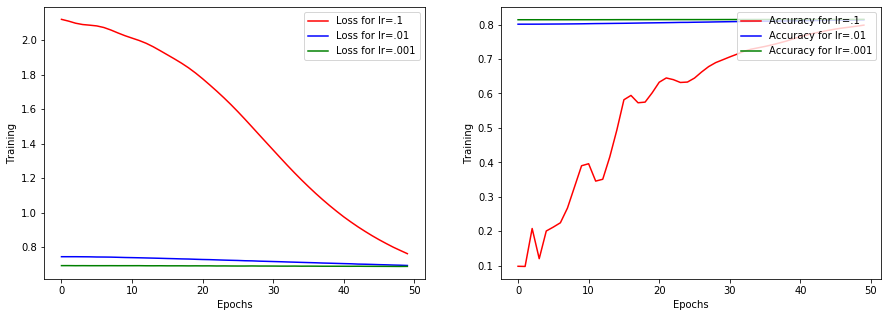

In [ ]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss1,'r-',label='Loss for lr=.1')
plt.plot(range(num_epochs),train_loss2,'b-',label='Loss for lr=.01')
plt.plot(range(num_epochs),train_loss3,'g-',label='Loss for lr=.001') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc1,'r-',label='Accuracy for lr=.1')
plt.plot(range(num_epochs),train_acc2,'b-',label='Accuracy for lr=.01')
plt.plot(range(num_epochs),train_acc3,'g-',label='Accuracy for lr=.001') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')